Import the libraries we will need

In [191]:
from mdss.ScoringFunctions.Bernoulli import Bernoulli
from mdss.MDSS import MDSS

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

import warnings

warnings.filterwarnings('ignore')

Load the data from a csv, drop the first column, and fill the missing values with -999.

Also, define the target cols

In [192]:
# data = pd.read_csv('/dataF/madiva/data/madiva_project2_comma_delim.csv')
data = pd.read_csv('../cvd_data_awigenv1.csv').drop(columns = 
       ['Unnamed: 0', 'study_id', 'chf_meds_qc','angina_meds_qc', 'pain_action_stop_or_slow_qc', 'pain_action_rest_qc',
       'pain_action_medicine_qc', 'pain_action_carry_on_qc','days_bread_qc', 'sugardrinks_qc', 'chf_treatment_yn_qc',
       'relief_standstill_qc', 'relief_standstill_qc.1', 'pain_location_1_qc','asthma_qc', 'obesity_mom_qc',
       'pain_location_2_qc', 'pain_location_3_qc', 'pain_location_4_qc', 'days_fruit_qc', 'days_veg_qc',
       'pain_location_5_qc', 'pain_location_6_qc', 'pain_location_7_qc','bp_sys_average_qc', 'bp_dia_average_qc', 'pulse_average_qc',
       'pain_location_8_qc', 'pain_location_9_qc', 'pain_location_10_qc','stroke_diagnosed_qc', 'weakness_qc',
       'numbness_qc', 'blindness_qc', 'half_vision_loss_qc','avg_sleep_per_night_c','pesticide_qc', 
       'understanding_loss_qc', 'expression_loss_qc', 'angina_treatment_yn_qc', 'heartattack_qc.1',
       'heartattack_treatment_qc', 'heartattack_traditional_qc','chf_treat_now_qc', 'chf_traditional_qc', 
       'pain_location_11_qc', 'pain_location_12_qc', 'pain_location_13_qc', 'hip_circumference_qc',
       'pain_location_14_qc', 'pain_location_15_qc', 'pain_location_16_qc','acr_qc', 'egfr_c_qc',
       'pain_location_17_qc', 'pain_location_18_qc','angina_treat_now_qc', 'angina_traditional_qc', 'pain_qc', 'pain2_qc']).fillna(-999)
# target_cols = ['htn_jnc7_qc', 'diabetes_status_c_qc', 'ckd_c_qc', 'cadiovascular_current']
target_cols = ['htn_jnc7_qc', 'diabetes_status_c_qc']
data.head()

,site,age,sex,number_of_children_c,partnership_status_c_qc,highest_level_of_education_qc,occupation_qc,ses_site_quintile_c_qc,smoking_status_c_qc,alcohol_use_status_c_qc,...,stroke_qc,transient_ischemic_attack_qc,angina_qc,heartattack_qc,congestive_heart_failure_qc,cadiovascular_current,ckd_c_qc,htn_jnc7_qc,diabetes_status_c_qc,bmi_c_qc
0,1,80,1,10.0,1,0,-999,1,2,3,...,0,-999,0,0,0,-999.0,-999,1,0,22.26
1,1,73,1,5.0,1,0,4,4,0,3,...,0,-999,0,0,0,-999.0,-999,1,0,36.99
2,1,80,1,9.0,2,0,4,2,0,0,...,0,-999,0,0,0,-999.0,-999,0,0,21.57
3,1,79,0,4.0,1,0,3,2,0,0,...,0,-999,0,0,0,-999.0,-999,1,0,21.92
4,1,73,0,7.0,2,0,3,3,0,0,...,0,-999,0,0,0,-999.0,-999,1,0,28.19


In [194]:
data.shape

(12032, 32)

In [193]:
data.columns

Index(['site', 'age', 'sex', 'number_of_children_c', 'partnership_status_c_qc',
       'highest_level_of_education_qc', 'occupation_qc',
       'ses_site_quintile_c_qc', 'smoking_status_c_qc',
       'alcohol_use_status_c_qc', 'mvpa_c', 'hiv_final_status_c',
       'waist_circumference_qc', 'waist_hip_r_c_qc', 'visceral_fat_qc',
       'subcutaneous_fat_qc', 'mean_cimt_right_qc', 'mean_cimt_left_qc',
       's_creatinine_qc', 'ldl_qc', 'triglycerides_qc', 'cholesterol_1_qc',
       'stroke_qc', 'transient_ischemic_attack_qc', 'angina_qc',
       'heartattack_qc', 'congestive_heart_failure_qc',
       'cadiovascular_current', 'ckd_c_qc', 'htn_jnc7_qc',
       'diabetes_status_c_qc', 'bmi_c_qc'],
      dtype='object')

Define the numeric columns we are going to bin by choosing features that have more than 10 unique items and have numbers

In [154]:
# Simple Function to calcuate CVD
def calculate_CVD(a,b,c,d,e):
    col=0
    if (int(a)==1 or int(b)==1 or int(c)==1 or int(d)==1 or int(e)==1):
        col=1
    elif (int(a)==0 and int(b)==0 and int(c)==0 and int(d)==0 and int(e)==0):
        col = 0
    elif (int(a)==pd.isna and int(b)==pd.isna and int(c)==pd.isna and int(d)==pd.isna and int(e)==pd.isna):
        col = 0
    return col

In [175]:
com=[]
for i in range(data.shape[0]):
    com.append(calculate_CVD(data.stroke_qc.iloc[i], data.transient_ischemic_attack_qc.iloc[i], data.heartattack_qc.iloc[i], data.congestive_heart_failure_qc.iloc[i], data.angina_qc.iloc[i]))
y1=pd.DataFrame(com, columns=['cvd'])

In [156]:
numeric_columns = [col for col in data.columns \
                     if (is_numeric_dtype(data[col])) \
                     & (col not in target_cols) \
                     & (data[col].nunique() > 10)]

In [176]:
data = pd.concat([y1,data],axis=1).copy()

In [158]:


target_cols = ['htn_jnc7_qc', 'diabetes_status_c_qc']

In [177]:
site_id = 1 # 1 - Agincourt, 3 - Nairobi

# Choose the relevant site and age group
dff = data[(data['site'] == site_id) & (data['age'] <= 60) & (data['age'] >= 40)].fillna(-999)

print('Original size: ', dff.shape)
dff = dff[(dff[target_cols] != -999).sum(axis = 1) == len(target_cols)]
print('Size after removing records with missing targets: ', dff.shape)

Original size:  (1465, 33)
Size after removing records with missing targets:  (1465, 33)


In [195]:
dff1 = dff.replace([-999, -222, -111, 999], np.nan).copy()

site_id = 1 # 1 - Agincourt, 3 - Nairobi

# Choose the relevant site and age group
dff = data[(data['site'] == site_id) & (data['age'] <= 60) & (data['age'] >= 40)].fillna(-999)

print('Original size: ', dff.shape)
dff = dff[(dff[target_cols] != -999).sum(axis = 1) == len(target_cols)]
print('Size after removing records with missing targets: ', dff.shape)

Original size:  (1465, 32)
Size after removing records with missing targets:  (1465, 32)


In [180]:
predictor_cols = [#'site', 
       'age', 'sex', 'number_of_children_c', 
        'partnership_status_c_qc', 'highest_level_of_education_qc', 'occupation_qc',
       'ses_site_quintile_c_qc', 'smoking_status_c_qc', 'alcohol_use_status_c_qc', 
#        'days_fruit_qc', 'days_veg_qc', 'days_bread_qc', 'sugardrinks_qc', 
        'mvpa_c',
#        'asthma_qc', 
       'obesity_mom_qc','hiv_final_status_c', 
       'waist_circumference_qc', 
       # 'hip_circumference_qc', 
       'waist_hip_r_c_qc', 
       # 'pulse_average_qc',
       'visceral_fat_qc', 'subcutaneous_fat_qc', 'mean_cimt_right_qc',
       'mean_cimt_left_qc', 'ldl_qc', 'triglycerides_qc',
       'bmi_c_qc', 'cholesterol_1_qc']

<Axes: ylabel='Density'>

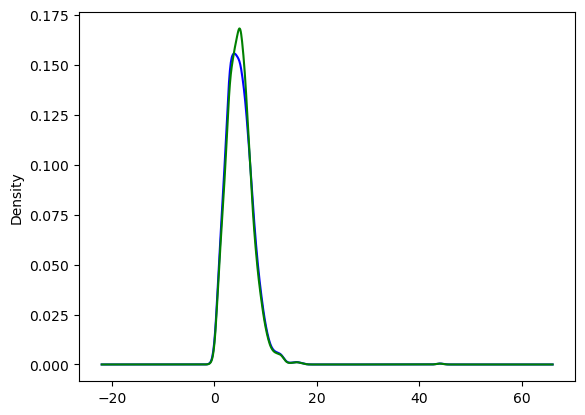

In [183]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=42)

# let's create a MICE imputer using Bayes as estimator

imputer = IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=10, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0,
)
imputer.fit(dff1[predictor_cols])
train_t = imputer.transform(dff1[predictor_cols])
# train_x = imputer.transform(data.iloc[:,2:])
treated = pd.DataFrame(train_t, columns=dff1[predictor_cols].columns)
treated = treated.apply(np.ceil)

fig = plt.figure()
ax = fig.add_subplot(111)
dff1['number_of_children_c'].plot(kind='kde', ax=ax, color='blue')
treated['number_of_children_c'].plot(kind='kde', ax=ax, color='green')

In [186]:
treated['number_of_children_c'].isnull().sum()

0

In [99]:
target_col = 'multimorbidity'

# defining the target column to be a column where the sum of the target values >= 2
dff[target_col] = (dff[target_cols] == 1).sum(axis = 1) >= 2

# defining the expectations as mean of the target
dff['expectation'] = dff[target_col].mean()
dff['expectation'].head()

381    0.050512
391    0.050512
393    0.050512
408    0.050512
416    0.050512
Name: expectation, dtype: float64

In [100]:
dff['expectation'].unique()

array([0.05051195])

In [101]:
site_id = 1 # 1 - Agincourt, 3 - Nairobi

# Choose the relevant site and age group
dff = data[(data['site'] == site_id) & (data['age'] <= 60) & (data['age'] >= 40)].fillna(-999)

print('Original size: ', dff.shape)
dff = dff[(dff[target_cols] != -999).sum(axis = 1) == len(target_cols)]
print('Size after removing records with missing targets: ', dff.shape)

Original size:  (1465, 39)
Size after removing records with missing targets:  (1465, 39)


In [106]:
dff[target_col].mean()

0.050511945392491465

In [187]:
dff1.mean_cimt_right_qc.value_counts()

0.55    65
0.52    63
0.58    59
0.53    58
0.54    54
        ..
0.82     1
1.05     1
1.18     1
1.21     1
0.95     1
Name: mean_cimt_right_qc, Length: 63, dtype: int64

In [105]:
target_col = 'multimorbidity'

# defining the target column to be a column where the sum of the target values >= 2
dff[target_col] = (dff[target_cols] == 1).sum(axis = 1) >= 2

# defining the expectations as mean of the target
dff['expectation'] = dff[target_col].mean()
dff['expectation'].head()

381    0.050512
391    0.050512
393    0.050512
408    0.050512
416    0.050512
Name: expectation, dtype: float64

In [190]:
dff['multimorbidity']

KeyError: 'multimorbidity'

In [107]:
# Defining the search space to be all the features except site, study_id, 
# and our created target_col and expectations columns

search_space = [col for col in dff.columns \
                if col not in \
                [target_col, 'site', 'study_id', 'expectation', \
                'htn_jnc7_qc', 'diabetes_status_c_qc']]

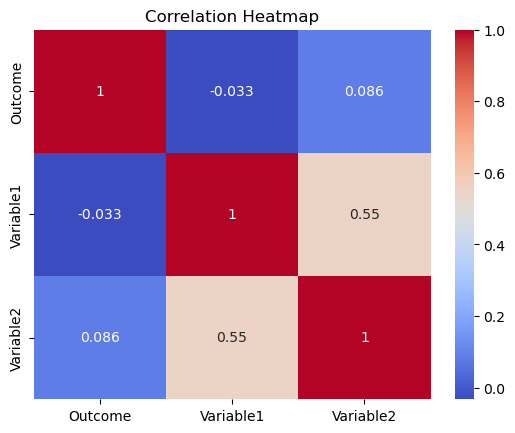

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data with binary outcomes and numeric variables
import pandas as pd
data = pd.DataFrame({
    'Outcome': [0, 1, 0, 1, 0, 1, 0, 0],
    'Variable1': [3, 4, 2, 1, 5, 6, 7, 2],
    'Variable2': [8, 7, 5, 6, 9, 10, 7, 8]
})

# Create a heatmap to visualize correlations
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


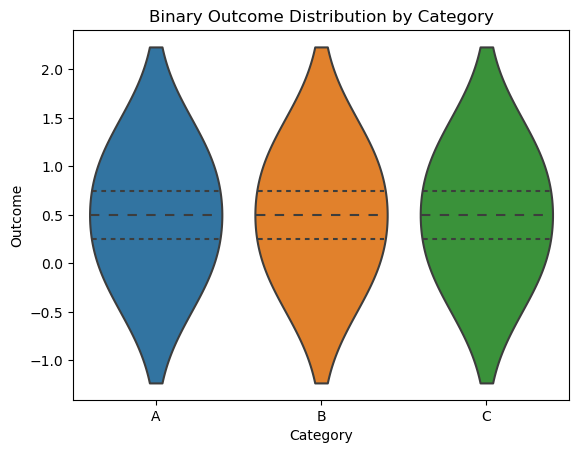

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data with binary outcomes and categories
import pandas as pd
data = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Outcome': [0, 1, 0, 1, 0, 1]
})

# Create a violin plot to visualize distributions
sns.violinplot(x='Category', y='Outcome', data=data, inner='quart')
plt.xlabel('Category')
plt.ylabel('Outcome')
plt.title('Binary Outcome Distribution by Category')
plt.show()


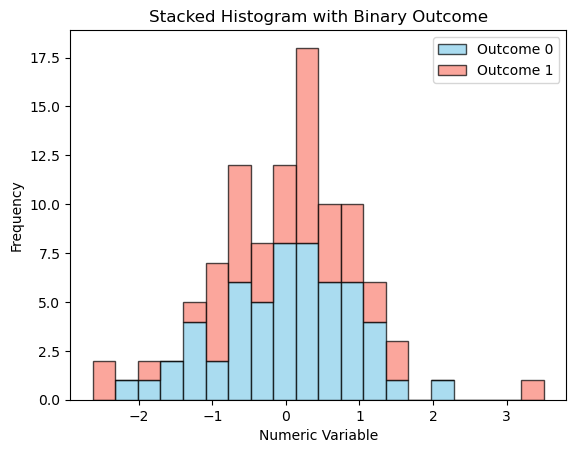

In [57]:
# import matplotlib.pyplot as plt

# # Example binary data
# data = [0, 1, 0, 1, 0, 1, 0, 0]

# # Count the occurrences of each outcome
# counts = [data.count(0), data.count(1)]

# # Labels for the outcomes
# labels = ['Outcome 0', 'Outcome 1']

# # Create a bar chart to visualize the distribution
# plt.bar(labels, counts, color=['lightblue', 'lightgreen'])
# plt.xlabel('Outcome')
# plt.ylabel('Count')
# plt.title('Binary Outcome Distribution')
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Example data: binary outcomes (0 or 1) and another numeric variable
binary_data = np.random.randint(2, size=100)  # Generating 100 random binary values (0 or 1)
numeric_data = np.random.randn(100)  # Generating random numeric data

# Create a stacked histogram
plt.hist([numeric_data[binary_data == 0], numeric_data[binary_data == 1]], bins=20, alpha=0.7, label=['Outcome 0', 'Outcome 1'], color=['skyblue', 'salmon'], edgecolor='black', stacked=True)

plt.xlabel('Numeric Variable')
plt.ylabel('Frequency')
plt.title('Stacked Histogram with Binary Outcome')
plt.legend()
plt.show()




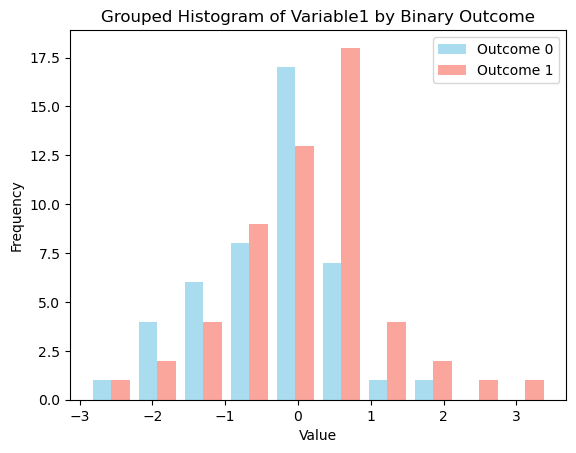

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Example data with binary outcomes and two numeric variables
np.random.seed(40)  # For reproducibility
binary_outcomes = np.random.randint(2, size=100)  # Generating 100 random binary values (0 or 1)
variable1 = np.random.normal(0, 1, 100)  # Generating random data for Variable1
variable2 = np.random.normal(2, 1, 100)  # Generating random data for Variable2

# Group data by binary outcome
outcome_0_data = variable1[binary_outcomes == 0]
outcome_1_data = variable1[binary_outcomes == 1]

# Create a grouped histogram
plt.hist([outcome_0_data, outcome_1_data], bins=10, alpha=0.7, label=['Outcome 0', 'Outcome 1'], color=['skyblue', 'salmon'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Grouped Histogram of Variable1 by Binary Outcome')
plt.legend()
plt.show()


In [70]:
outcome_1_data.shape

(55,)

In [108]:
search_space

['cvd',
 'age',
 'sex',
 'number_of_children_c',
 'partnership_status_c_qc',
 'highest_level_of_education_qc',
 'occupation_qc',
 'ses_site_quintile_c_qc',
 'smoking_status_c_qc',
 'alcohol_use_status_c_qc',
 'mvpa_c',
 'asthma_qc',
 'obesity_mom_qc',
 'hiv_final_status_c',
 'pesticide_qc',
 'waist_circumference_qc',
 'waist_hip_r_c_qc',
 'visceral_fat_qc',
 'subcutaneous_fat_qc',
 'mean_cimt_right_qc',
 'mean_cimt_left_qc',
 's_creatinine_qc',
 'ldl_qc',
 'triglycerides_qc',
 'acr_qc',
 'egfr_c_qc',
 'cholesterol_1_qc',
 'stroke_qc',
 'transient_ischemic_attack_qc',
 'angina_qc',
 'heartattack_qc',
 'congestive_heart_failure_qc',
 'chf_treatment_yn_qc',
 'cadiovascular_current',
 'ckd_c_qc',
 'bmi_c_qc']

In [109]:
len(search_space)

36

In [ ]:
dff1 = dff.replace([-999, -222, -111], np.nan).copy()

In [110]:
def get_str(x):
    # This function turns a pandas bin to a meaningful string
    s = str(round(x.left, 2)) + ' - ' + str(round(x.right,2))
    return s

def custom_qcut(ser, contiguous = True):
    # Get the rows that are actual numbers
    sub_ser = ser[(ser != -111) \
                     & (ser != -222) \
                     & (ser != -555) \
                     & (ser != -999)]
    
    if contiguous:
        # if contiguous, treat all the special numbers the same
        ser = ser.replace(-111 , -999)
        ser = ser.replace(-222 , -999)
        ser = ser.replace(-555 , -999)

    # Bin the actual numbers into 10 bins for scanning
    sub_ser = pd.qcut(sub_ser, 10, duplicates='drop')
    sub_ser = sub_ser.apply(get_str).astype(str)
    ser[list(sub_ser.index)] = sub_ser
    return ser
            

In [111]:
contiguous = {}
dff_2 = dff.copy()

# Create a new dataframe with the numeric columns bins     
for col in numeric_columns:
    if col in search_space:
        dff_2[col] = custom_qcut(dff_2[col].copy())
        
        bins = list(dff_2[col].unique())
        
        if -999 in bins:
            bins.remove(-999)
        
        bins = sorted(bins, key=lambda x : float(x.split(' - ')[0]))
        
        contiguous[col] = bins

In [112]:
def compress_contiguous(subset, contiguous):
    # Shorten a contiguous list e.g [0-9, 10-19] is converted to [0 - 19] 
    new = {}
    
    for col in subset:
        if col in contiguous:
            if isinstance(subset[col][0], (float,int)):
                new[col] = [str(c) for c in subset[col]]
                continue
            i = -1 if isinstance(subset[col][-1], str) else -2
            new[col] = [subset[col][0].split(' - ')[0] + ' - ' + subset[col][i].split(' - ')[-1]]
            new[col] = new[col] if i == -1 else new[col] + [str(subset[col][-1])]
        else:
            new[col] = [str(c) for c in subset[col]]
    return new

def translate_subset_to_rule(subset):
    # Print the subset as a rule for easier understanding
    desc = ''
    for key, value in subset.items():
        desc += key + ' = {' + ' OR '.join(value) + '} AND' + '\n'

    return desc[:-5].replace('_',' ').replace('{', '(').replace('}', ')')

Using Autostrat, i.e. scanning, in the positive direction

In [126]:
%%time
# Scan in the positive direction using defined penalties and num iters

scoring_function = Bernoulli(direction='positive')
scanner = MDSS(scoring_function)

penalty = 5
num_iters = 10

subset, score = scanner.scan(dff_2[search_space], dff_2[target_col], dff_2['expectation'],cpu = .95,
                             penalty = penalty, num_iters = num_iters, contiguous = contiguous.copy())
subset, score

CPU times: user 391 ms, sys: 88.4 ms, total: 479 ms
Wall time: 8.4 s


({'number_of_children_c': ['5.0 - 6.0', '6.0 - 7.0'],
  'ses_site_quintile_c_qc': [5],
  'waist_hip_r_c_qc': ['0.92 - 0.94',
   '0.94 - 0.97',
   '0.97 - 1.0',
   '1.0 - 1.16']},
 5.943216895894704)

In [129]:
%%time
# Scan in the positive direction using defined penalties and num iters

scoring_function = Bernoulli(direction='positive')
scanner = MDSS(scoring_function)
# Define a list of penalty values to loop through
penalty_values = [1, 2, 3, 4, 5, 6, 7]

# Initialize empty lists to store results
subset_results = []
score_results = []

# Loop through each penalty value
for penalty in penalty_values:
    # Perform the scan with the current penalty value
    subset, score = scanner.scan(dff_2[search_space], dff_2[target_col], dff_2['expectation'], cpu=0.95,
                                 penalty=penalty, num_iters=num_iters, contiguous=contiguous.copy())
    
    # Append the results to the respective lists
    subset_results.append(subset)
    score_results.append(score)

# Display the results for each penalty value
for i, penalty in enumerate(penalty_values):
    print(f"Penalty = {penalty}: Subset = {subset_results[i]}, Score = {score_results[i]}")


Penalty = 1: Subset = {'cholesterol_1_qc': ['3.91 - 4.21', '4.21 - 4.52', '4.52 - 4.86', '4.86 - 5.34', '5.34 - 9.97'], 'hiv_final_status_c': [0], 'triglycerides_qc': ['1.0 - 1.14', '1.14 - 1.49', '1.49 - 5.34'], 'acr_qc': ['0.62 - 0.81', '0.81 - 1.12', '1.12 - 1.68', '1.68 - 3.08', '3.08 - 6.93', '6.93 - 387.04'], 'partnership_status_c_qc': [1], 'mean_cimt_right_qc': ['0.67 - 0.73', '0.73 - 1.32', -999.0], 'number_of_children_c': ['3.0 - 4.0', '4.0 - 5.0', '5.0 - 6.0', '6.0 - 7.0', '7.0 - 8.0', '8.0 - 44.0'], 'pesticide_qc': [0]}, Score = 26.212100598666204
Penalty = 2: Subset = {'waist_hip_r_c_qc': ['0.94 - 0.97', '0.97 - 1.0', '1.0 - 1.16'], 'hiv_final_status_c': [0], 'number_of_children_c': ['5.0 - 6.0', '6.0 - 7.0', '7.0 - 8.0', '8.0 - 44.0']}, Score = 11.973205326248145
Penalty = 3: Subset = {'mean_cimt_right_qc': ['0.67 - 0.73', '0.73 - 1.32', -999.0], 'triglycerides_qc': ['1.0 - 1.14', '1.14 - 1.49', '1.49 - 5.34'], 'cholesterol_1_qc': ['3.91 - 4.21', '4.21 - 4.52', '4.52 - 4.8

In [128]:
# print the subset we obtained as a rule
print(translate_subset_to_rule(compress_contiguous(subset, contiguous)))

waist hip r c qc = (1.0 - 1.16) AND
mean cimt right qc = (0.67 - 1.32 OR -999.0)


In [132]:
# print some information about the subset
to_choose = dff_2[subset.keys()].isin(subset).all(axis=1)
temp_df = dff_2.loc[to_choose]

size = len(temp_df)
observed_income = np.round(temp_df[target_col].mean(), 3)
positive_class_count = temp_df[target_col].sum()

group_obs = temp_df[target_col].mean()
group_prob = temp_df['expectation'].mean()
odds_mul = (group_obs / (1 - group_obs)) / (group_prob /(1 - group_prob))

print("Our detected subgroup has a size of {} \nRecall that our population average is {}\
      \nIn this subgroup, we observe a mean outcome of {}\nWith {} individuals in the group above average \
      \nThis is a multiplicative factor in the odds (i.e q) of {}".\
      format(size, group_prob , observed_income, positive_class_count, np.round(odds_mul, 3)))

Our detected subgroup has a size of 314 
Recall that our population average is 0.05051194539249147      
In this subgroup, we observe a mean outcome of 0.003
With 1 individuals in the group above average       
This is a multiplicative factor in the odds (i.e q) of 0.06


Doing the same scanning process as above in the negative direction

In [144]:
%%time

scoring_function = Bernoulli(direction='negative')
scanner = MDSS(scoring_function)

penalty = 1
num_iters = 15

subset, score = scanner.scan(dff_2[search_space], dff_2[target_col], dff_2['expectation'],  cpu = .95,
                             penalty = penalty, num_iters = num_iters, contiguous = contiguous.copy())
subset, score

CPU times: user 567 ms, sys: 83.3 ms, total: 650 ms
Wall time: 9.21 s


({'age': ['40.0 - 42.0',
   '42.0 - 44.0',
   '44.0 - 47.0',
   '47.0 - 50.0',
   '50.0 - 51.0',
   '51.0 - 53.0',
   '53.0 - 55.0',
   '55.0 - 57.0'],
  'waist_circumference_qc': ['510.0 - 740.0', '740.0 - 780.0']},
 12.56486285033507)

In [130]:
# %%time
# Scan in the positive direction using defined penalties and num iters

scoring_function = Bernoulli(direction='negative')
scanner = MDSS(scoring_function)
# Define a list of penalty values to loop through
penalty_values = [1, 2, 3, 4, 5, 6, 7]

# Initialize empty lists to store results
subset_results = []
score_results = []

# Loop through each penalty value
for penalty in penalty_values:
    # Perform the scan with the current penalty value
    subset, score = scanner.scan(dff_2[search_space], dff_2[target_col], dff_2['expectation'], cpu=0.95,
                                 penalty=penalty, num_iters=num_iters, contiguous=contiguous.copy())
    
    # Append the results to the respective lists
    subset_results.append(subset)
    score_results.append(score)

# Display the results for each penalty value
for i, penalty in enumerate(penalty_values):
    print(f"Penalty = {penalty}: Subset = {subset_results[i]}, Score = {score_results[i]}")

Penalty = 1: Subset = {'age': ['40.0 - 42.0', '42.0 - 44.0', '44.0 - 47.0', '47.0 - 50.0', '50.0 - 51.0', '51.0 - 53.0', '53.0 - 55.0', '55.0 - 57.0'], 'waist_circumference_qc': ['510.0 - 740.0', '740.0 - 780.0']}, Score = 12.56486285033507
Penalty = 2: Subset = {'age': ['40.0 - 42.0', '42.0 - 44.0', '44.0 - 47.0', '47.0 - 50.0', '50.0 - 51.0', '51.0 - 53.0', '53.0 - 55.0', '55.0 - 57.0'], 'waist_circumference_qc': ['510.0 - 740.0', '740.0 - 780.0']}, Score = 10.56486285033507
Penalty = 3: Subset = {'waist_circumference_qc': ['510.0 - 740.0', '740.0 - 780.0']}, Score = 9.461265634299018
Penalty = 4: Subset = {'waist_circumference_qc': ['510.0 - 740.0', '740.0 - 780.0']}, Score = 8.461265634299018
Penalty = 5: Subset = {'waist_circumference_qc': ['510.0 - 740.0', '740.0 - 780.0']}, Score = 7.461265634299018
Penalty = 6: Subset = {'waist_circumference_qc': ['510.0 - 740.0', '740.0 - 780.0']}, Score = 6.461265634299018
Penalty = 7: Subset = {'waist_circumference_qc': ['510.0 - 740.0', '74

In [145]:
print(translate_subset_to_rule(compress_contiguous(subset, contiguous)))

age = (40.0 - 57.0) AND
waist circumference qc = (510.0 - 780.0)


In [146]:
to_choose = dff_2[subset.keys()].isin(subset).all(axis=1)
temp_df = dff_2.loc[to_choose]

size = len(temp_df)
observed_income = np.round(temp_df[target_col].mean(), 3)
positive_class_count = temp_df[target_col].sum()

group_obs = temp_df[target_col].mean()
group_prob = temp_df['expectation'].mean()
odds_mul = (group_obs / (1 - group_obs)) / (group_prob /(1 - group_prob))

print("Our detected subgroup has a size of {} \nRecall that our population average is {}\
      \nIn this subgroup, we observe a mean outcome of {}\nWith {} individuals in the group above average\
      \nThis is a multiplicative factor in the odds (i.e q) of {}".\
      format(size, group_prob , observed_income, positive_class_count, np.round(odds_mul, 3)))

Our detected subgroup has a size of 281 
Recall that our population average is 0.05051194539249148      
In this subgroup, we observe a mean outcome of 0.0
With 0 individuals in the group above average      
This is a multiplicative factor in the odds (i.e q) of 0.0
